In [8]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns



In [9]:
p_all = pd.read_csv("../data/interim/all_train.csv") # processed data by Ralf
p_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234488 entries, 0 to 234487
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  234488 non-null  object 
 1   p_num     234488 non-null  object 
 2   bg        177042 non-null  float64
 3   insulin   223601 non-null  float64
 4   carbs     3340 non-null    float64
 5   hr        173535 non-null  float64
 6   steps     114273 non-null  float64
 7   cals      192003 non-null  float64
 8   activity  4228 non-null    object 
 9   bg+1:00   177024 non-null  float64
dtypes: float64(7), object(3)
memory usage: 17.9+ MB


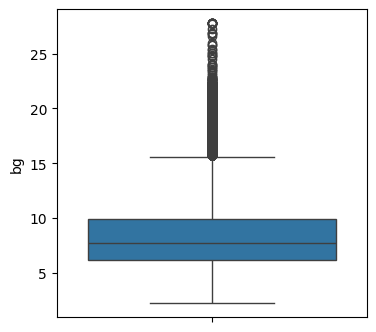

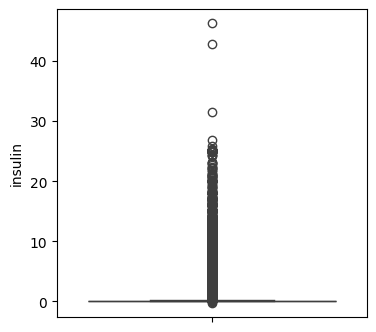

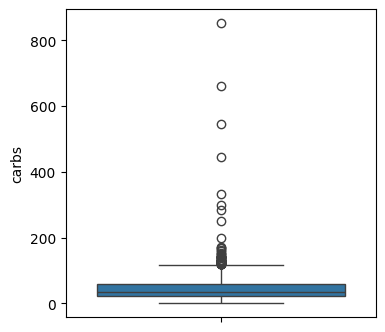

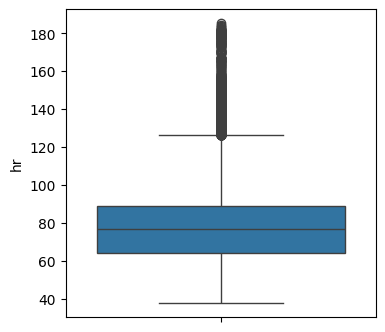

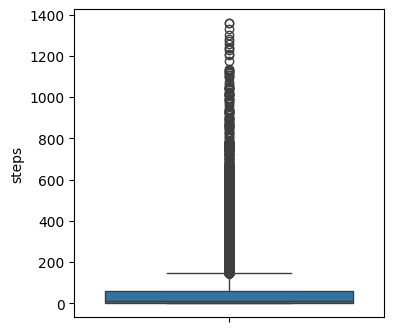

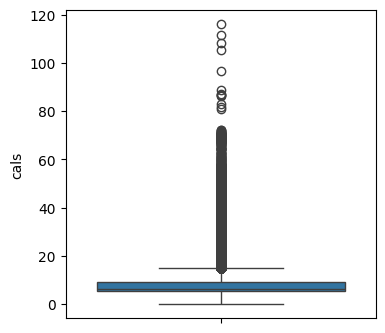

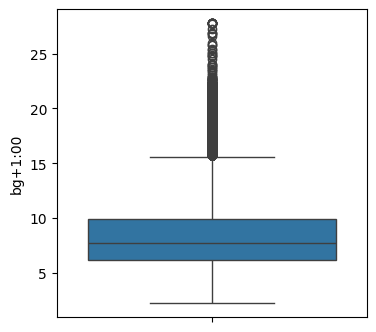

In [14]:
import matplotlib.pyplot as plt

# Select numeric columns
var_num = p_all.select_dtypes(include=['float'])

for col in var_num.columns:
    # Remove non-finite values (NaN and infinite values)
    finite_data = var_num[col][np.isfinite(var_num[col])]
    plt.figure(figsize=(4, 4))
    sns.boxplot(finite_data);

QQ-Plot for bg
QQ-Plot for insulin
QQ-Plot for carbs
QQ-Plot for hr
QQ-Plot for steps
QQ-Plot for cals
QQ-Plot for bg+1:00


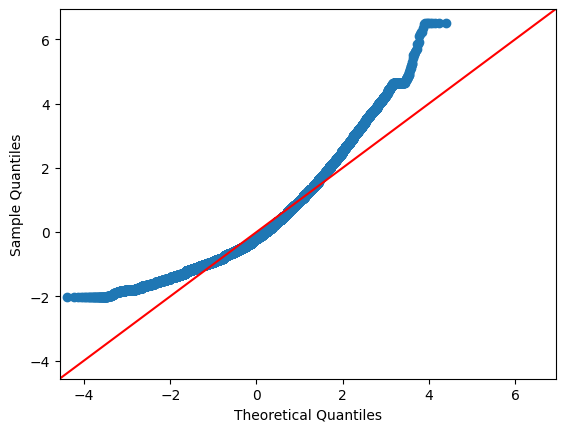

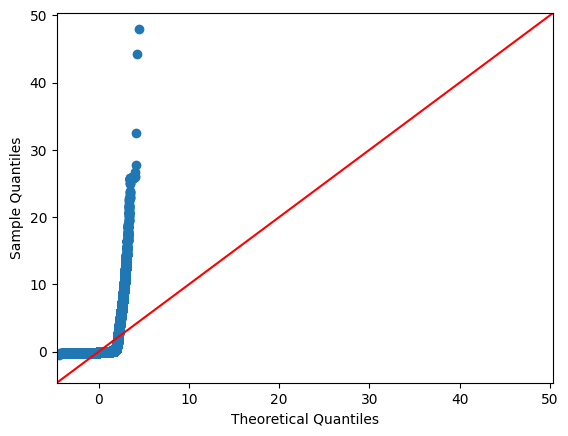

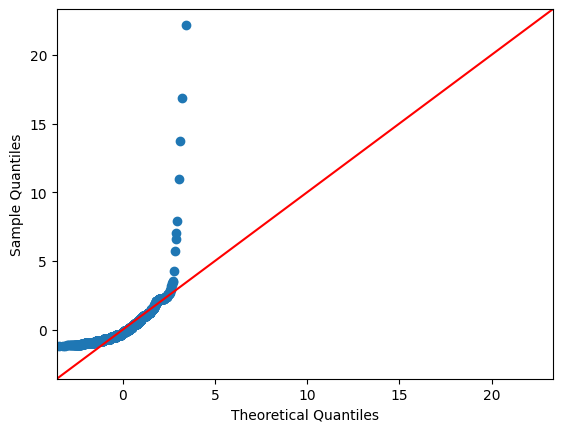

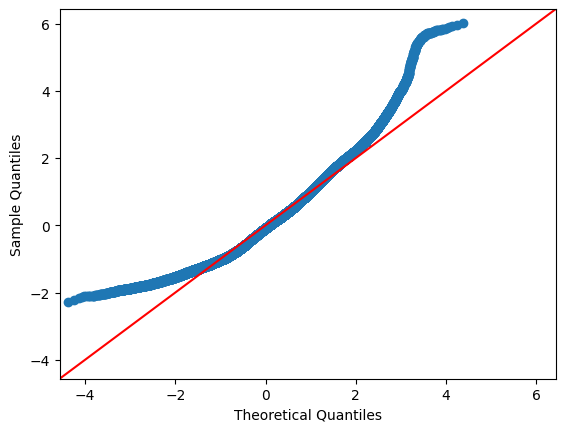

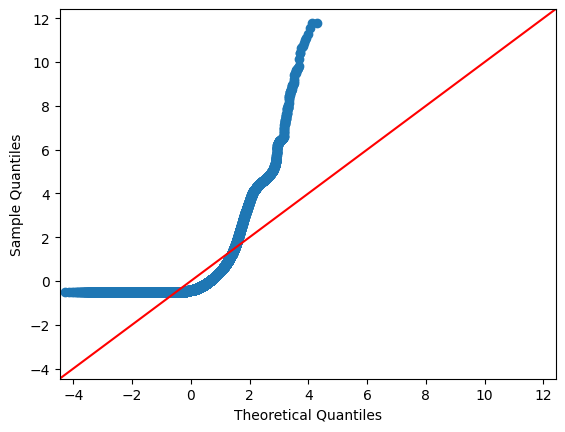

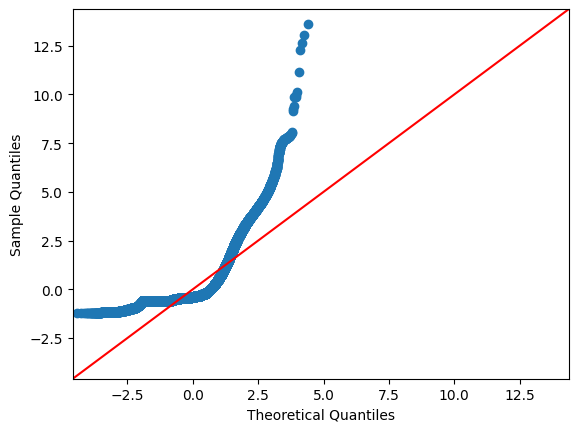

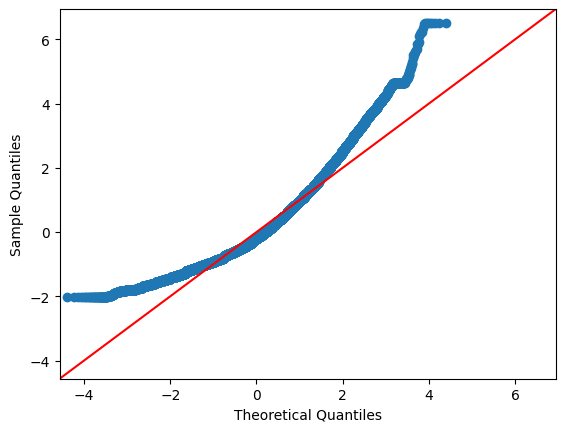

In [7]:
for col in var_num.columns:
    # Remove non-finite values (NaN and infinite values)
    finite_data = var_num[col][np.isfinite(var_num[col])]
    print(f"QQ-Plot for {col}")    
    sm.qqplot(finite_data, fit=True, line='45')

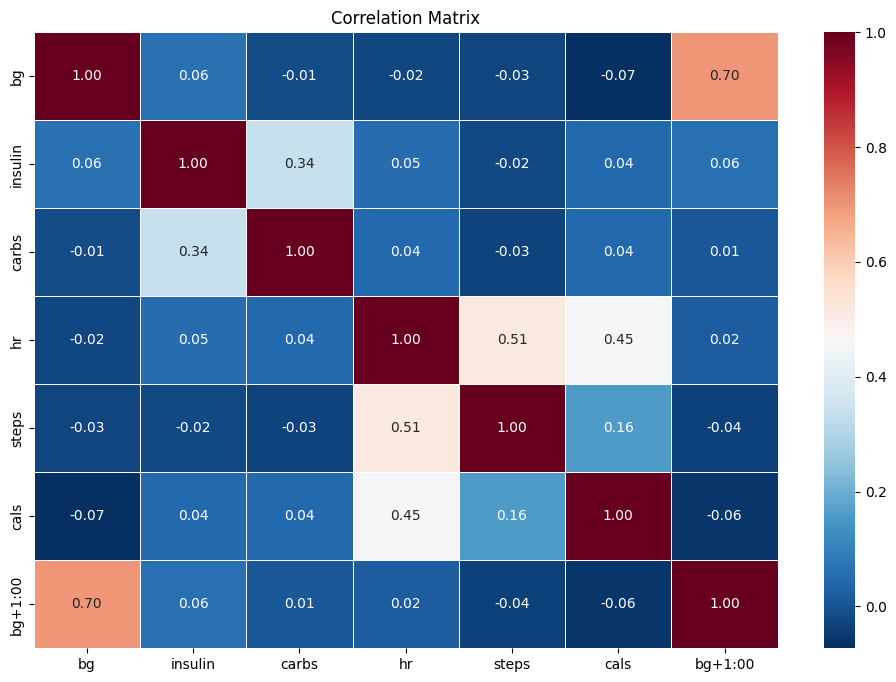

In [16]:
# Select numeric columns
var_num = p_all.select_dtypes(include=['float'])

corr_matrix = var_num.corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5)

# Add title
plt.title("Correlation Matrix")
plt.show()